In [1]:
%pylab inline

import os
from itertools import product

from styles import slides

Populating the interactive namespace from numpy and matplotlib


In [2]:
list1 = sorted([os.path.join(root, file) for root, subs, files in os.walk(os.path.expandvars("data/amr-dichotomy/test_c2/av0_1_4Z_CaIIHK_long/")) for file in files if file.startswith("dynbasfit_processed_")])

C2_table = genfromtxt("data/amr-dichotomy/test_c2/C2_table.txt", dtype=None, names=True)

t1 = genfromtxt(os.path.expandvars("data/amr-dichotomy/test_c2/av0_1_4Z_CaIIHK_long/dynbas_output.log"), dtype=None, names=True)

m22 = loadtxt("data/amr-dichotomy/m22.txt")
m32 = loadtxt("data/amr-dichotomy/m32.txt")
m42 = loadtxt("data/amr-dichotomy/m42.txt")
m52 = loadtxt("data/amr-dichotomy/m52.txt")
m62 = loadtxt("data/amr-dichotomy/m62.txt")
m72 = loadtxt("data/amr-dichotomy/m72.txt")

ages = array([1.015E+08,  1.015E+09,  3.000E+09,  1.000E+10])/1e9
mets = array([0.0001, 0.0004, 0.004, 0.008, 0.02, 0.05])/0.02
mods = [m22, m32, m42, m52, m62, m72]
wlrs = [(390, 400), (515, 520), (840, 870)] # [(339, 391), (515, 520), (587, 592)]

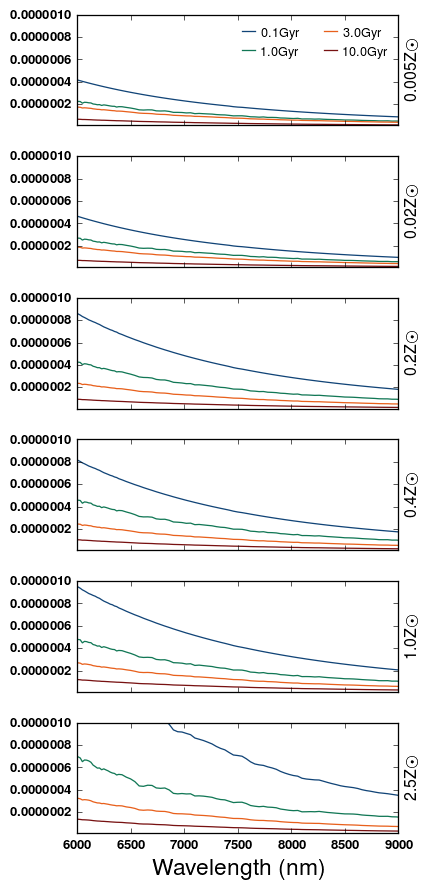

In [3]:
fig, axs = subplots(len(mods), 1, figsize=(5, 10), sharex=True, sharey=True)

xlim(6000, 9000)
ylim(1e-8, 1e-6)

axs[-1].set_xlabel("Wavelength (nm)")

for i in xrange(axs.shape[0]):
    ls = axs[i].plot(mods[i][:, 0]/10., mods[i][:, 1:], "-", lw=1)
    
    axs[i].yaxis.set_label_position("right")
    axs[i].set_ylabel("{0}Z$\odot$".format(mets[i]), size="x-small")
        
axs[0].legend(ls, map(lambda t: "{0:.1f}Gyr".format(t), ages), loc=0, fontsize=10, ncol=2)

fig.tight_layout()

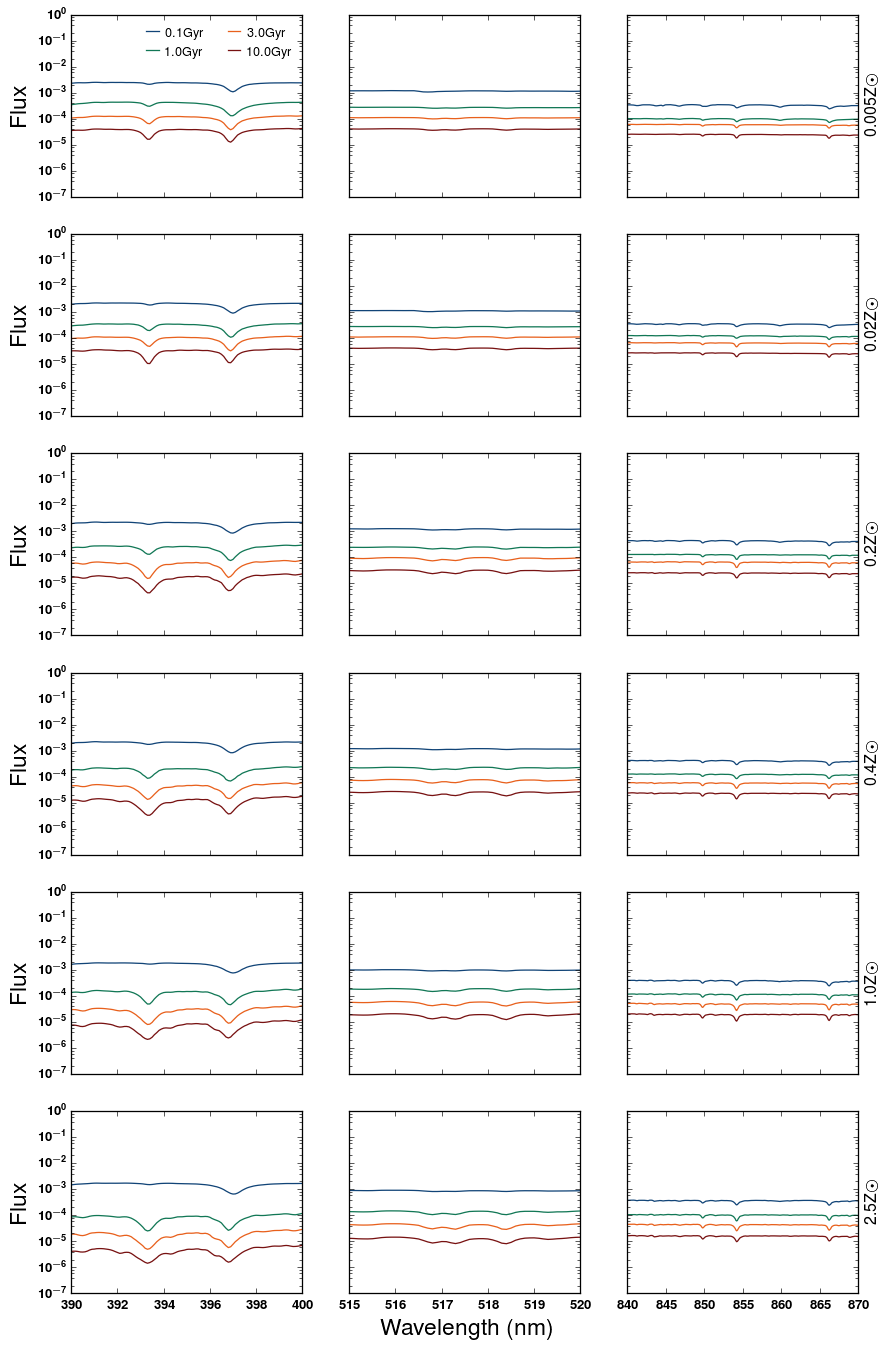

In [4]:
fig, axs = subplots(len(mods), len(wlrs), figsize=(10, 15), sharex="col", sharey=True)

ylim(1e-7, 1)

axs[-1, 1].set_xlabel("Wavelength (nm)")

for i, j in product(xrange(axs.shape[0]), xrange(axs.shape[1])):
    ls = axs[i, j].semilogy(mods[i][:, 0]/10., mods[i][:, 1:], "-", lw=1)
    axs[i, j].set_xlim(wlrs[j])
    
    if j == 0: axs[i, j].set_ylabel("Flux")
    if j == len(wlrs)-1:
        axs[i, j].yaxis.set_label_position("right")
        axs[i, j].set_ylabel("{0}Z$\odot$".format(mets[i]), size="x-small")
        
axs[0, 0].legend(ls, map(lambda t: "{0:.1f}Gyr".format(t), ages), loc=0, fontsize=10, ncol=2)

fig.tight_layout()

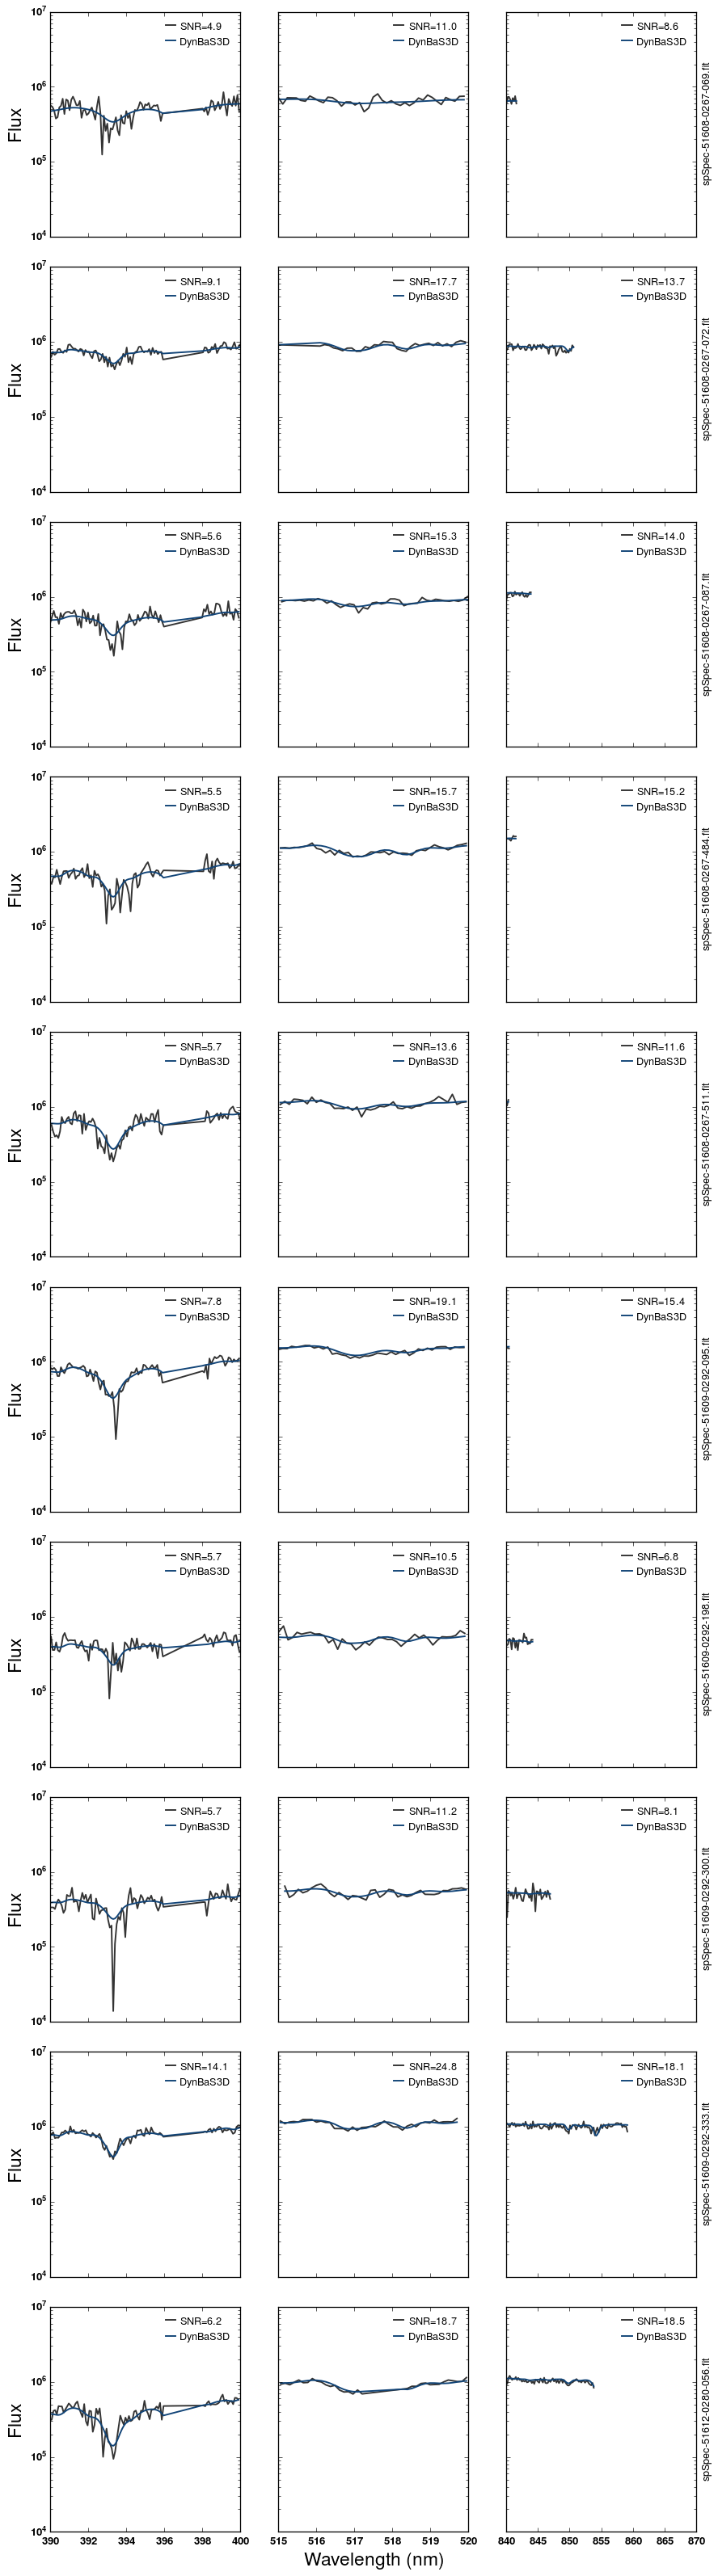

In [5]:
slist = list1[:10]

fig, axs = subplots(len(slist), len(wlrs), figsize=(10, 35), sharex="col", sharey=True)

ylim(1e4, 1e7)

axs[-1, 1].set_xlabel("Wavelength (nm)")

for i, j in product(xrange(len(slist)), xrange(len(wlrs))):
    if j == 0: axs[i, j].set_ylabel("Flux")
    if j == len(wlrs)-1:
        axs[i, j].yaxis.set_label_position("right")
        axs[i, j].set_ylabel(sname, size=10)

    sname = "spSpec"+slist[i].split("/")[-1].lstrip("dynbasfit_processed_SPEC_").replace(".log", ".fit")
    wl, fl, sg, m3 = loadtxt(slist[i], usecols=(0,1,2,5), unpack=True)
    wl /= 10.
    mask = (wl>=wlrs[j][0])&(wl<=wlrs[j][1])&(fl>0.0)
    if mask.sum() == 0: continue
    axs[i, j].semilogy(wl[mask], fl[mask], "-", color="0.2", lw=1.5, label="SNR={0:.1f}".format(median(fl[mask]/sg[mask])))
    axs[i, j].semilogy(wl[mask], m3[mask], "-", lw=1.5, label="DynBaS3D")
    axs[i, j].set_xlim(wlrs[j])
    axs[i, j].legend(loc=0, fontsize=10)

fig.tight_layout()

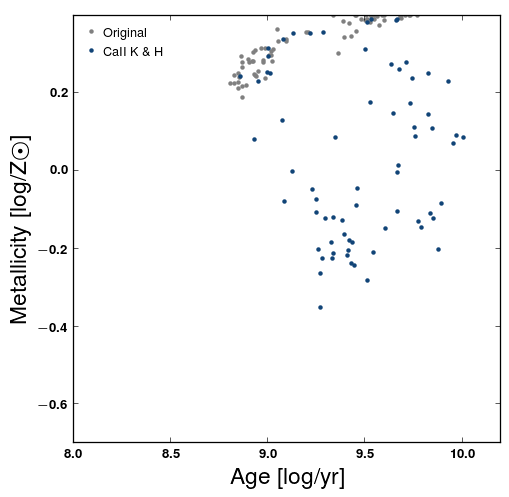

In [6]:
plot(C2_table["log_t_L_mod"], C2_table["log_Z_L_mod"], ".", color="0.5", label="Original")
plot(t1["lw_logage"], t1["lw_logz_zo"], ".", label="CaII K \& H")

legend(loc=2, fontsize=10)
xlim(8.0, 10.2)
ylim(-0.7, 0.4)
xlabel("Age [log/yr]")
ylabel("Metallicity [log/Z$\odot$]")